# Beauty Rating Based on Facial Proportions

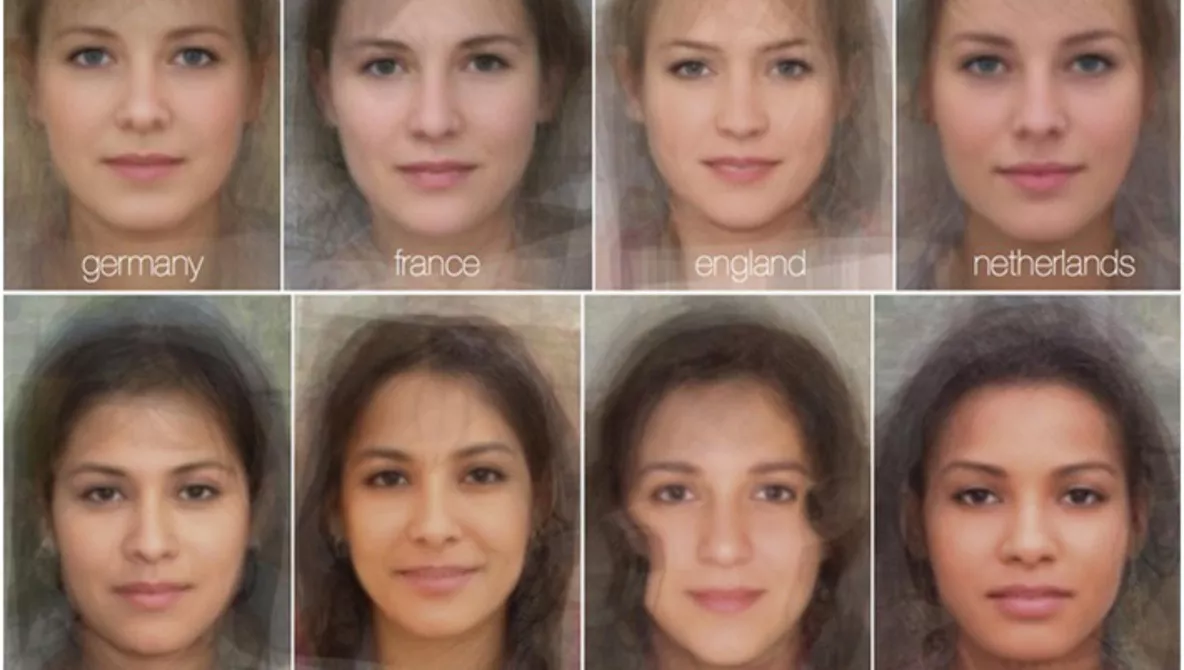

In [1]:
# install the dependencies
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
data=pd.read_excel("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\Excel file\\Features.xlsx")

C:\Users\Pranav\.continuum\ppp\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data.head()

,Race,Gender,Age,Afraid,Angry,Attractive,Babyface,Disgusted,Dominant,Feminine,...,EyeShape,EyeSize,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR
0,A,F,32.571429,2.035714,1.571429,4.111111,2.857143,1.392857,1.928571,5.629630,...,0.404651,0.060924,0.414099,0.326797,0.130719,0.264706,0.388189,91.5,0.545752,1.921146
1,A,F,23.666667,1.814815,3.111111,3.111111,2.481481,2.592593,2.111111,4.111111,...,0.329204,0.041892,0.414414,0.329279,0.144595,0.300901,0.383784,146.0,0.488288,1.901129
2,A,F,24.448276,1.464286,1.862069,3.000000,2.344828,1.551724,2.862069,3.206897,...,0.357939,0.051586,0.411080,0.310317,0.173424,0.298475,0.397029,58.0,0.481333,1.888249
3,A,F,22.758621,2.586207,1.655172,3.275862,3.862069,1.620690,1.750000,5.000000,...,0.443200,0.063913,0.354407,0.343793,0.169820,0.272266,0.421089,87.5,0.500231,1.863719
4,A,F,30.137931,2.551724,1.586207,3.172414,2.068966,1.655172,1.758621,4.629630,...,0.432247,0.053435,0.438931,0.293045,0.180237,0.293893,0.371925,73.5,0.513571,1.935783


In [4]:
# shape of dataset
data.shape

(597, 56)

In [5]:
# information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Race                 597 non-null    object 
 1   Gender               597 non-null    object 
 2   Age                  597 non-null    float64
 3   Afraid               597 non-null    float64
 4   Angry                597 non-null    float64
 5   Attractive           597 non-null    float64
 6   Babyface             597 non-null    float64
 7   Disgusted            597 non-null    float64
 8   Dominant             597 non-null    float64
 9   Feminine             597 non-null    float64
 10  Happy                597 non-null    float64
 11  Masculine            597 non-null    float64
 12  Sad                  597 non-null    float64
 13  Surprised            597 non-null    float64
 14  Threatening          597 non-null    float64
 15  Trustworthy          597 non-null    flo

In [6]:
# find ot null value in dataset
data.isnull().sum()

Race                   0
Gender                 0
Age                    0
Afraid                 0
Angry                  0
Attractive             0
Babyface               0
Disgusted              0
Dominant               0
Feminine               0
Happy                  0
Masculine              0
Sad                    0
Surprised              0
Threatening            0
Trustworthy            0
Unusual                0
Nose_Width             0
Nose_Length            0
Lip_Thickness          0
Face_Length            0
R_Eye_H                0
L_Eye_H                0
Avg_Eye_Height         0
R_Eye_W                0
L_Eye_W                0
Avg_Eye_Width          0
Face_Width_Cheeks      0
Face_Width_Mouth       0
Forehead               0
Pupil_Top_R            0
Pupil_Top_L            0
Asymmetry_pupil_top    0
Pupil_Lip_R            0
Pupil_Lip_L            0
Asymmetry_pupil_lip    0
BottomLip_Chin         0
Midcheek_Chin_R        0
Midcheek_Chin_L        0
Cheeks_avg             0


In [7]:
# Describe the data in mathamatical form
data.describe()

,Age,Afraid,Angry,Attractive,Babyface,Disgusted,Dominant,Feminine,Happy,Masculine,...,EyeShape,EyeSize,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,...,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,28.862569,1.919597,2.319002,3.231866,2.396149,2.034271,2.832425,3.109984,2.420304,3.271255,...,0.350816,0.049236,0.382264,0.322231,0.180815,0.297818,0.402504,89.568984,0.465981,1.856525
std,6.299164,0.390809,0.624729,0.768702,0.629186,0.458991,0.674656,1.540666,0.643790,1.415443,...,0.044160,0.007419,0.028355,0.021440,0.025375,0.027488,0.025685,59.087365,0.059266,0.142718
min,16.935484,1.120000,1.160000,1.520000,1.040000,1.142857,1.333333,1.000000,1.037037,1.107143,...,0.172084,0.022808,0.276959,0.260997,0.103120,0.218750,0.342557,0.014599,0.366209,1.434188
25%,24.653846,1.652174,1.880000,2.688172,1.961538,1.720000,2.321429,1.600000,1.925926,1.884615,...,0.323970,0.044567,0.364261,0.308549,0.162488,0.279425,0.384763,0.136992,0.422037,1.760447
50%,27.275862,1.872340,2.208333,3.144444,2.320000,2.000000,2.730769,3.033333,2.321429,3.225806,...,0.352472,0.049385,0.384453,0.322404,0.181195,0.298394,0.398406,112.000000,0.450150,1.846689
75%,32.000000,2.123596,2.698925,3.730769,2.802326,2.321429,3.233333,4.593750,2.777778,4.620690,...,0.379496,0.053681,0.401369,0.336269,0.197077,0.317300,0.419450,134.000000,0.500964,1.946772
max,56.384615,3.898876,4.815217,5.478261,4.370370,3.752941,5.423077,6.000000,4.541667,6.192308,...,0.467687,0.071462,0.445616,0.391638,0.263134,0.393050,0.507669,191.000000,0.651494,2.300000


In [8]:
# finding out maximum attractive score in datset
data["Attractive"].max()

5.47826087

In [9]:
data[data["Attractive"]==data["Attractive"].max()]

,Race,Gender,Age,Afraid,Angry,Attractive,Babyface,Disgusted,Dominant,Feminine,...,EyeShape,EyeSize,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR
484,W,F,22.608696,1.652174,1.608696,5.478261,3.608696,1.478261,1.818182,5.913043,...,0.365607,0.054667,0.41357,0.312014,0.163354,0.322602,0.367545,119.5,0.378997,1.80204


In [10]:
# Convert age column in INT dataformate
data["Age"]=data["Age"].astype(int)

In [11]:
data

,Race,Gender,Age,Afraid,Angry,Attractive,Babyface,Disgusted,Dominant,Feminine,...,EyeShape,EyeSize,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR
0,A,F,32,2.035714,1.571429,4.111111,2.857143,1.392857,1.928571,5.629630,...,0.404651,0.060924,0.414099,0.326797,0.130719,0.264706,0.388189,91.5,0.545752,1.921146
1,A,F,23,1.814815,3.111111,3.111111,2.481481,2.592593,2.111111,4.111111,...,0.329204,0.041892,0.414414,0.329279,0.144595,0.300901,0.383784,146.0,0.488288,1.901129
2,A,F,24,1.464286,1.862069,3.000000,2.344828,1.551724,2.862069,3.206897,...,0.357939,0.051586,0.411080,0.310317,0.173424,0.298475,0.397029,58.0,0.481333,1.888249
3,A,F,22,2.586207,1.655172,3.275862,3.862069,1.620690,1.750000,5.000000,...,0.443200,0.063913,0.354407,0.343793,0.169820,0.272266,0.421089,87.5,0.500231,1.863719
4,A,F,30,2.551724,1.586207,3.172414,2.068966,1.655172,1.758621,4.629630,...,0.432247,0.053435,0.438931,0.293045,0.180237,0.293893,0.371925,73.5,0.513571,1.935783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,W,M,30,1.307692,2.076923,3.153846,2.076923,1.615385,3.230769,1.230769,...,0.317629,0.045613,0.395460,0.333261,0.207770,0.327586,0.397425,99.0,0.460498,1.819875
593,W,M,34,1.444444,2.250000,2.259259,1.571429,1.821429,3.214286,1.642857,...,0.403537,0.050933,0.384740,0.327719,0.220373,0.304180,0.392857,161.0,0.379464,1.735140
594,W,M,30,1.769231,2.384615,2.269231,2.615385,1.961538,3.230769,1.640000,...,0.365443,0.050401,0.392661,0.323070,0.195276,0.347111,0.389287,160.0,0.407001,1.860584
595,W,M,30,1.925926,1.333333,3.740741,2.280000,1.185185,2.185185,1.814815,...,0.360061,0.051249,0.392765,0.314384,0.212317,0.322782,0.396210,127.0,0.455211,1.839591


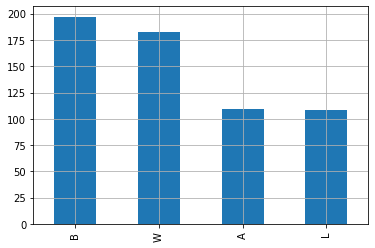

In [12]:
# Visualize  the Race column
data["Race"].value_counts().plot(kind="bar")
plt.grid(True)
plt.show()

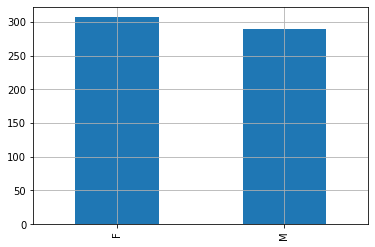

In [13]:
# Visualize  the Gender column
data["Gender"].value_counts().plot(kind="bar")
plt.grid(True)
plt.show()

## Correlation and removal of highly correlation features

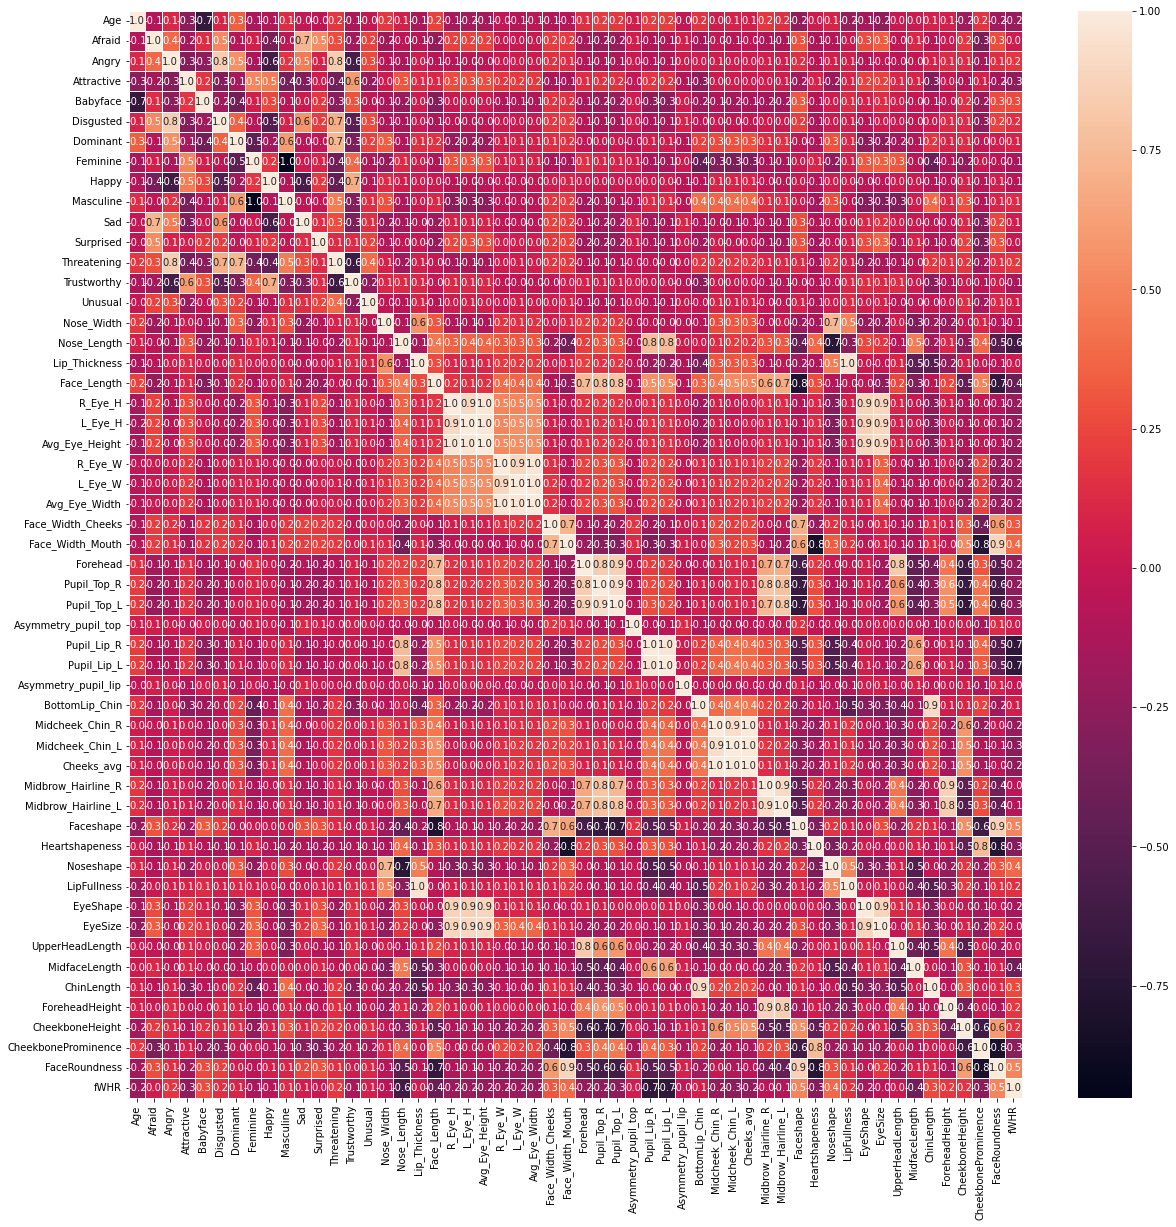

In [14]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

In [15]:
# Drop some column 
col_drop=['R_Eye_H','L_Eye_H','Pupil_Top_R','Pupil_Top_L','Midcheek_Chin_R','Midcheek_Chin_L',
         'EyeSize','Faceshape','BottomLip_Chin','Pupil_Lip_R','Lip_Thickness']

In [16]:
data1=data.drop(col_drop,axis=1)

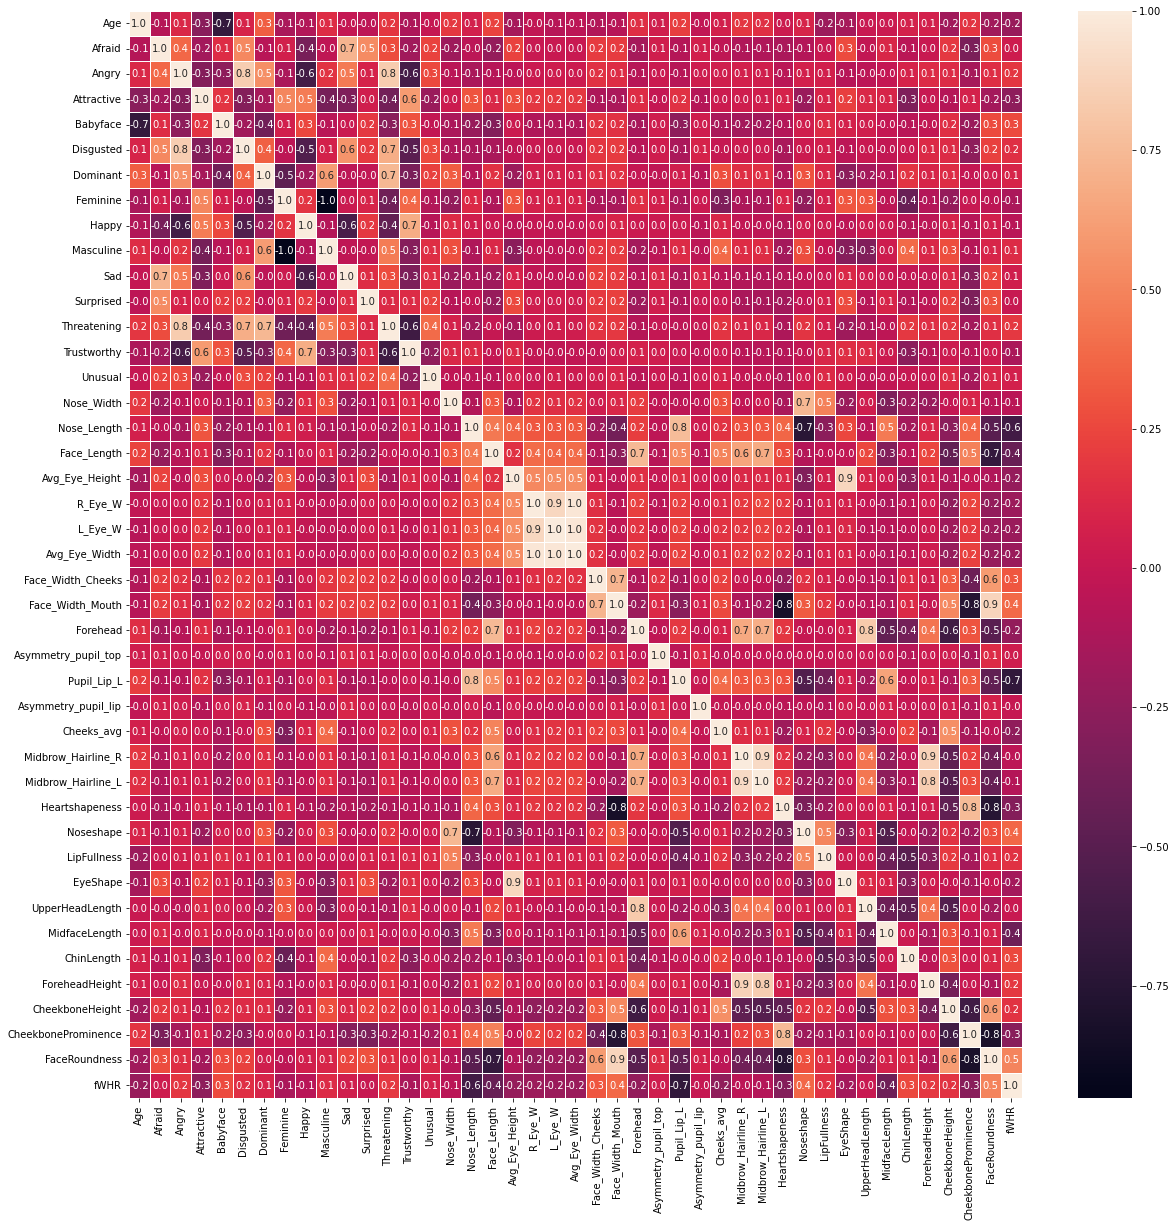

In [17]:
# Affer droping column heatmap
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Race                 597 non-null    object 
 1   Gender               597 non-null    object 
 2   Age                  597 non-null    int32  
 3   Afraid               597 non-null    float64
 4   Angry                597 non-null    float64
 5   Attractive           597 non-null    float64
 6   Babyface             597 non-null    float64
 7   Disgusted            597 non-null    float64
 8   Dominant             597 non-null    float64
 9   Feminine             597 non-null    float64
 10  Happy                597 non-null    float64
 11  Masculine            597 non-null    float64
 12  Sad                  597 non-null    float64
 13  Surprised            597 non-null    float64
 14  Threatening          597 non-null    float64
 15  Trustworthy          597 non-null    flo

## Converting the Categorical to Numerical

In [19]:
data1=pd.get_dummies(data1,columns=['Race','Gender'])

In [20]:
data1

,Age,Afraid,Angry,Attractive,Babyface,Disgusted,Dominant,Feminine,Happy,Masculine,...,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR,Race_A,Race_B,Race_L,Race_W,Gender_F,Gender_M
0,32,2.035714,1.571429,4.111111,2.857143,1.392857,1.928571,5.629630,2.928571,1.357143,...,0.388189,91.5,0.545752,1.921146,1,0,0,0,1,0
1,23,1.814815,3.111111,3.111111,2.481481,2.592593,2.111111,4.111111,1.555556,1.666667,...,0.383784,146.0,0.488288,1.901129,1,0,0,0,1,0
2,24,1.464286,1.862069,3.000000,2.344828,1.551724,2.862069,3.206897,2.379310,3.000000,...,0.397029,58.0,0.481333,1.888249,1,0,0,0,1,0
3,22,2.586207,1.655172,3.275862,3.862069,1.620690,1.750000,5.000000,2.571429,1.724138,...,0.421089,87.5,0.500231,1.863719,1,0,0,0,1,0
4,30,2.551724,1.586207,3.172414,2.068966,1.655172,1.758621,4.629630,1.275862,1.482759,...,0.371925,73.5,0.513571,1.935783,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,30,1.307692,2.076923,3.153846,2.076923,1.615385,3.230769,1.230769,2.538462,4.807692,...,0.397425,99.0,0.460498,1.819875,0,0,0,1,0,1
593,34,1.444444,2.250000,2.259259,1.571429,1.821429,3.214286,1.642857,2.571429,4.714286,...,0.392857,161.0,0.379464,1.735140,0,0,0,1,0,1
594,30,1.769231,2.384615,2.269231,2.615385,1.961538,3.230769,1.640000,2.346154,4.384615,...,0.389287,160.0,0.407001,1.860584,0,0,0,1,0,1
595,30,1.925926,1.333333,3.740741,2.280000,1.185185,2.185185,1.814815,2.518519,4.346154,...,0.396210,127.0,0.455211,1.839591,0,0,0,1,0,1


## Split into test and train Data

In [22]:
X=data1.drop(['Attractive'],axis=1)
y=data1['Attractive']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (477, 48)
shape of X_test=  (120, 48)
shape of y_train=  (477,)
shape of y_test=  (120,)


## XGBOOST Regressor

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from math import sqrt

In [30]:
model=XGBRegressor(n_estimators=1000,learning_rate=0.3)

In [31]:
model.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test,y_test)],verbose=False)

C:\Users\Pranav\.continuum\ppp\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [32]:
pred1=model.predict(X_test)

In [33]:
data2=pd.DataFrame({'Actual':y_test,'Predicted':pred1,'Different':abs(y_test-pred1)})

In [34]:
data2

,Actual,Predicted,Different
405,3.333333,2.941306,0.392027
132,3.702128,3.618871,0.083257
211,2.666667,2.911457,0.244791
243,3.435294,3.911662,0.476368
85,2.173913,2.269542,0.095629
...,...,...,...
385,5.071429,3.991066,1.080363
528,4.586207,3.424157,1.162050
518,2.700000,3.211360,0.511360
491,2.206897,2.385571,0.178675


In [36]:
print("Maximum Difference",data2["Different"].max())
print("Maximum Difference",data2["Different"].min())

Maximum Difference 1.3423840999603271
Maximum Difference 0.0008291515556644313


In [37]:
print("Mean Absolute Error",mean_absolute_error(y_test,pred1))

Mean Absolute Error 0.3348104565070236


In [38]:
print("Mean Squared Error",mean_squared_error(y_test,pred1))

Mean Squared Error 0.18701001419403593


## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
reg=LinearRegression()

In [43]:
reg.fit(X_train,y_train)
data2=pd.DataFrame({'Actual':y_test,'Predicted':pred1,'Different':abs(y_test-pred1)})

In [44]:
data2

,Actual,Predicted,Different
405,3.333333,2.941306,0.392027
132,3.702128,3.618871,0.083257
211,2.666667,2.911457,0.244791
243,3.435294,3.911662,0.476368
85,2.173913,2.269542,0.095629
...,...,...,...
385,5.071429,3.991066,1.080363
528,4.586207,3.424157,1.162050
518,2.700000,3.211360,0.511360
491,2.206897,2.385571,0.178675


In [45]:
print("Maximum Difference",data2["Different"].max())
print("Maximum Difference",data2["Different"].min())

Maximum Difference 1.3423840999603271
Maximum Difference 0.0008291515556644313


In [46]:
print("Mean Absolute Error",mean_absolute_error(y_test,pred1))
print("Mean Squared Error",mean_squared_error(y_test,pred1))

Mean Absolute Error 0.3348104565070236
Mean Squared Error 0.18701001419403593
